In [7]:
import torch
import matplotlib.pyplot as plt

from Test import CirData
from Test import LatentData
re_lam=-1
seed=1
size=48

AE = torch.load('outputs/Cir_ablation_re{}seed{}size{}/model_best.pkl'.format(re_lam, seed, size), map_location='cpu')
ImgData = CirData(h=0.1, train_num=70, test_num=150, size=size)
data = LatentData(net=AE, data=ImgData)
dynnet=torch.load('outputs/Cir_ablation_latent_re{}seed{}size{}/model_best.pkl'.format(re_lam, seed, size), map_location='cpu')

torch.Size([149, 2]) (149,)


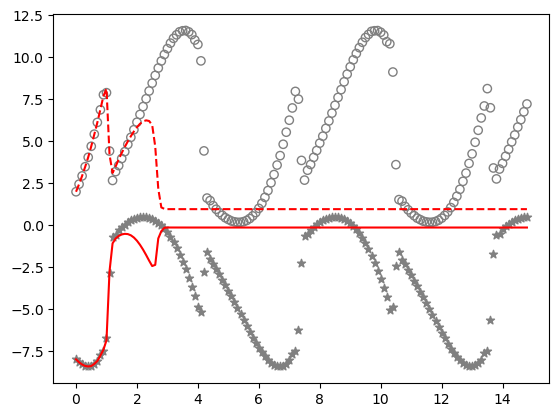

In [8]:

import numpy as np
t=np.arange(0, 14.9, 0.1)
print(data.X_test.shape, t.shape)

plt.scatter(t, data.X_test[:, 0], marker='*', color='gray')

plt.scatter(t, data.X_test[:, 1], marker='o', color='grey', edgecolor='gray', facecolors='none')

x0=data.X_test[0]
pre_traj=dynnet.predict(x0, h=0.1, steps=148, keepinitx=True, returnnp=True)
plt.plot(t, pre_traj[:,0], color='red')
plt.plot(t, pre_traj[:,1], linestyle='--', color='red')
# plt.ylim(-10,3)

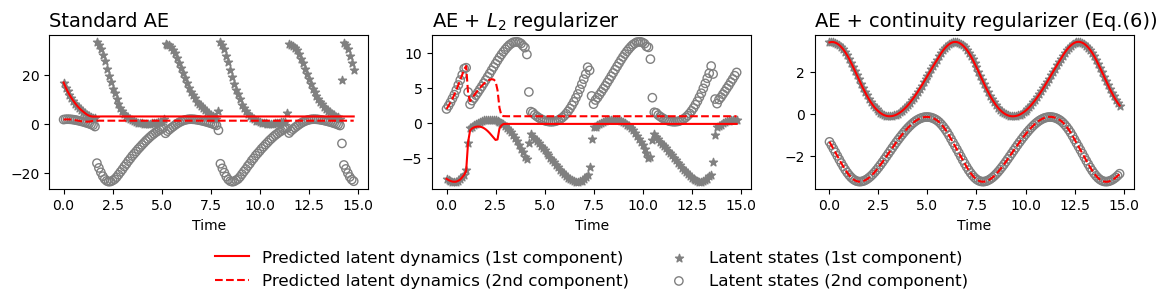

In [9]:
t=np.arange(0, 14.9, 0.1) 
ImgData = CirData(h=0.1, train_num=70, test_num=150, size=size)
fig, ax=plt.subplots(1, 3, figsize=(14,2))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)


re_lam=0
seed=0
size=48
i=0
AE1 = torch.load('outputs/Cir_ablation_re{}seed{}size{}/model_best.pkl'.format(re_lam, seed, size), map_location='cpu')
data = LatentData(net=AE1, data=ImgData)
dynnet1=torch.load('outputs/Cir_ablation_latent_re{}seed{}size{}/model_best.pkl'.format(re_lam, seed, size), map_location='cpu')

ax[i].scatter(t, data.X_test[:, 0], marker='*', color='gray')
ax[i].scatter(t, data.X_test[:, 1], marker='o', color='grey', edgecolor='gray', facecolors='none')
x0=data.X_test[0]
pre_traj1=dynnet1.predict(x0, h=0.1, steps=148, keepinitx=True, returnnp=True)
ax[i].plot(t, pre_traj1[:,0], color='red')
ax[i].plot(t, pre_traj1[:,1], linestyle='--', color='red')


re_lam=-1
seed=1
size=48
i=1
AE2 = torch.load('outputs/Cir_ablation_re{}seed{}size{}/model_best.pkl'.format(re_lam, seed, size), map_location='cpu')

data = LatentData(net=AE2, data=ImgData)
dynnet2=torch.load('outputs/Cir_ablation_latent_re{}seed{}size{}/model_best.pkl'.format(re_lam, seed, size), map_location='cpu')

ax[i].scatter(t, data.X_test[:, 0], marker='*', color='gray', label='Latent states (1st component)')
ax[i].scatter(t, data.X_test[:, 1], marker='o', color='grey', edgecolor='gray', facecolors='none' , label='Latent states (2nd component)')
x0=data.X_test[0]
pre_traj2=dynnet2.predict(x0, h=0.1, steps=148, keepinitx=True, returnnp=True)
ax[i].plot(t, pre_traj2[:,0], color='red', label='Predicted latent dynamics (1st component)')
ax[i].plot(t, pre_traj2[:,1], linestyle='--', color='red', label='Predicted latent dynamics (2nd component)')
# ax[i].set_ylim(-10,3)

ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), 
       fontsize=12, frameon=False, ncol=2)  

# ax[i].set_ylim(-4,3)

re_lam=1
seed=0
size=48
i=2
AE3 = torch.load('outputs/Cir_ablation_re{}seed{}size{}/model_best.pkl'.format(re_lam, seed, size), map_location='cpu')
data = LatentData(net=AE3, data=ImgData)
dynnet3=torch.load('outputs/Cir_ablation_latent_re{}seed{}size{}/model_best.pkl'.format(re_lam, seed, size), map_location='cpu')

ax[i].scatter(t, data.X_test[:, 0], marker='*', color='gray')
ax[i].scatter(t, data.X_test[:, 1], marker='o', color='grey', edgecolor='gray', facecolors='none')
x0=data.X_test[0]
pre_traj3=dynnet3.predict(x0, h=0.1, steps=148, keepinitx=True, returnnp=True)
ax[i].plot(t, pre_traj3[:,0], color='red')
ax[i].plot(t, pre_traj3[:,1], linestyle='--', color='red')
# ax[i].set_ylim(-4,3)


titlesize=14
ax[0].set_title('Standard AE', fontsize=titlesize, loc='left')
ax[1].set_title('AE + $L_2$ regularizer', fontsize=titlesize, loc='left')
ax[2].set_title('AE + continuity regularizer (Eq.(6))', fontsize=titlesize, loc='left')

for i in range(3):
    ax[i].set_xlabel('Time')


In [10]:
fig.savefig('Abl.pdf', bbox_inches='tight')

In [11]:
img3= AE3.decoder(torch.tensor(pre_traj3, dtype=torch.float32)).detach().numpy()
img2= AE2.decoder(torch.tensor(pre_traj2, dtype=torch.float32)).detach().numpy() 
img1= AE1.decoder(torch.tensor(pre_traj1, dtype=torch.float32)).detach().numpy() 

Text(0.0, 1.0, 'Prediction for Standard AE')

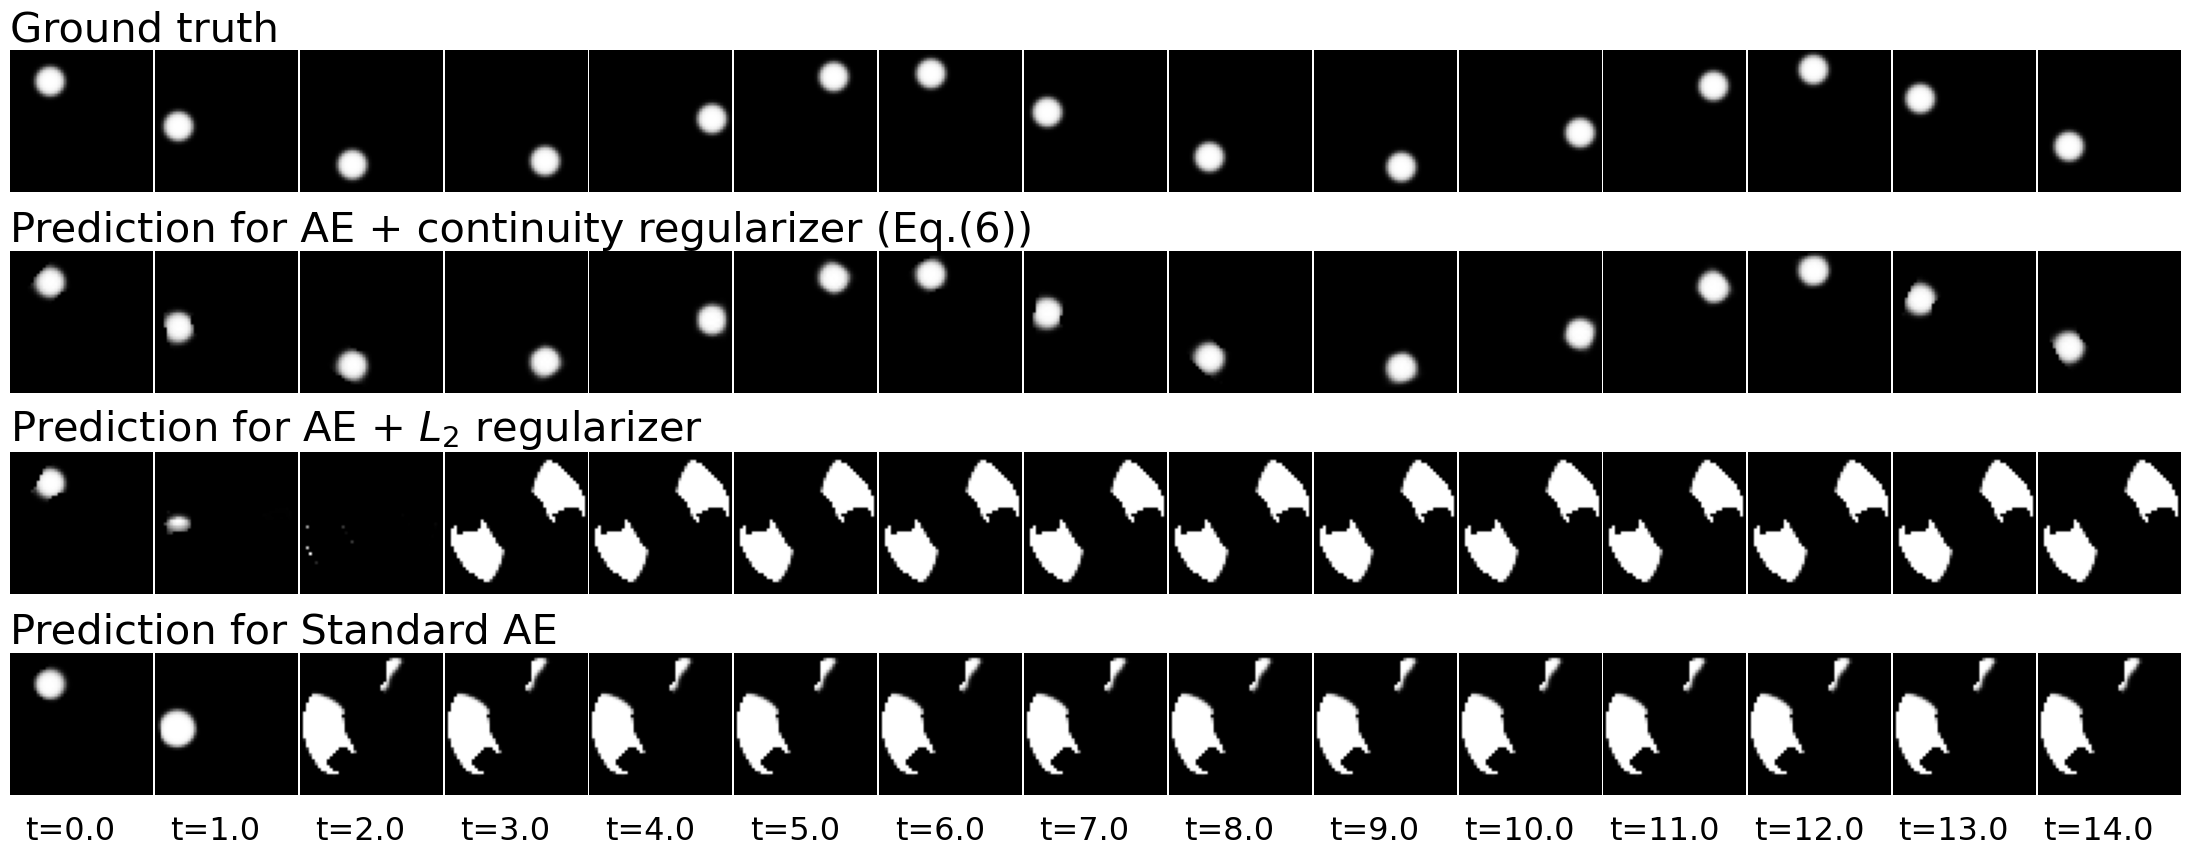

In [12]:
fig, ax=plt.subplots(4, 15, figsize=(28,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02, hspace=0.2)

steps=10
for i in range(15):
    ax[0,i].imshow(ImgData.X_test[steps*i, 0] , cmap='gray')
    ax[0, i].axis('off') 
    
    ax[1,i].imshow(img3[steps*i, 0] , cmap='gray')
    ax[1, i].axis('off') 
    
    ax[2,i].imshow(img2[steps*i, 0] , cmap='gray')
    ax[2, i].axis('off') 
    
    ax[3,i].imshow(img1[steps*i, 0] , cmap='gray')
    ax[3, i].axis('off') 
    

for i in range(15):
    ax[3,i].text(20,60, 't={}'.format(i*steps*0.1), fontsize=23, color='black',
      horizontalalignment='center', verticalalignment='center')
    

    
titlesize=30
ax[0,0].set_title('Ground truth', fontsize=titlesize, loc='left')
ax[1,0].set_title('Prediction for AE + continuity regularizer (Eq.(6))', fontsize=titlesize, loc='left')
ax[2,0].set_title('Prediction for AE + $L_2$ regularizer', fontsize=titlesize, loc='left')
ax[3,0].set_title('Prediction for Standard AE', fontsize=titlesize, loc='left') 

In [11]:
fig.savefig('Abl_re.png', bbox_inches='tight')